In [2]:
%pylab inline

from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


In [3]:
display(HTML(open('Notebook.css').read()))  #load the CCS style sheet

# A simple neuro model

Standard approach:

$$\begin{align*} 
\frac{\mathrm d V}{\mathrm d t} &= -\frac{V}{\tau} \\
V &= -\tau \frac{\mathrm d V}{\mathrm d t}\\
V[t+1] &= -\tau \frac{V[t+1] - V[t]}{\mathrm \Delta t} \\
\dots \\
V[t+1] &= a \times V[t] \\
\end{align*}$$

where
$$a = \frac{\tau}{\tau+1}$$

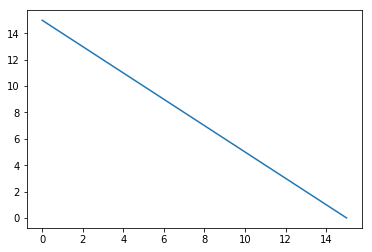

In [11]:
# using integers only mimics using a limited number of bits
nbits = 10
r = 2**nbits

tau = 19
a = (tau*r)/(tau+1)

V = 15
Vout = V
while V>0:
    V = a*V/r
    Vout = append(Vout,V)
    
plot(Vout);

$$a=(972)_{10}=(1111001100)_2$$
$$V=(15)_{10}=(1111)_2$$

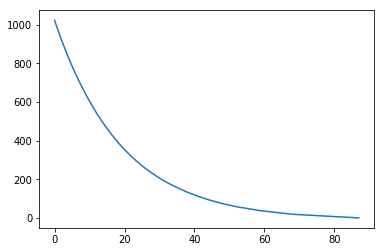

In [5]:
# using integers only mimics using a limited number of bits
nbits = 10
r = 2**nbits

tau = 19
a = (tau*r)/(tau+1)

V = 1023
Vout = V
while V>0:
    V = a*V/r
    Vout = append(Vout,V)
    
plot(Vout);

$$a=(972)_{10}=(1111001100)_2$$
$$V=(1023)_{10}=(1111111111)_2$$

# Radioactive Decay

random numbers $X$, decaying when $X \ge a$

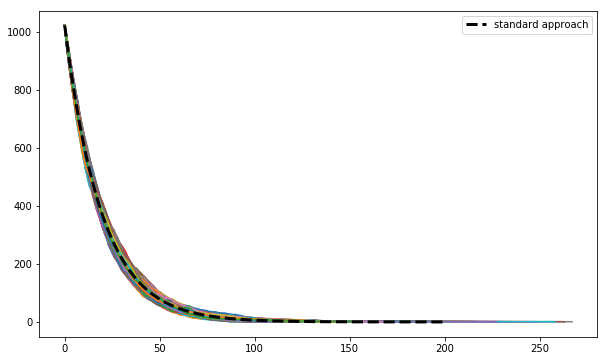

In [9]:
def dec2bin (N_bits,number):
    return fromiter((a for a in binary_repr(int(number),N_bits)), dtype=int_)[::-1]

def bin2dec (N_bits,number):
    return dot(number,fromiter((2**x for x in range(N_bits)), dtype=int_))

def stochastic_decay_ra(V_init = 1023, tau = 19, bits = 10):
    # stochastic decay from V_init (integer)
    # tau is the time constant in units of dt (integer)

    # initialisation
    a = tau/(tau+1.0)
    V_bin = dec2bin(bits,V_init)                # convert to binary
    V_int = V_init                              # reset initial voltage (Pablo: think of it as n of particles)
    Vs = V_int                                  # store V_int in trace for plotting
    t = 0                                       # initialise decay time counter

    while ( V_int > 0 ):                        # decay full trace for this seed
        V_int = bin2dec(bits, V_bin)            # convert binary stored state to integer
        r = rand(V_int)                         # generate V_int random numbers uniform in [0,1)
        d = sum(r>=a)                           # determine how many should decay
        V_int -= d                              # decrement V_int
        V_bin = dec2bin(bits ,V_int)            # convert back to binary (4 bits)
        Vs = append(Vs,V_int)                   # append V_int to trace
        t += 1                                  # increment decay time counter

    return Vs, t                                

fig = figure()
fig.set_size_inches(10,6)
ax= subplot(1,1,1)

V_init = 1023
tau = 19                                        # time constant in units of dt
a = tau/(tau+1.0)                               # IIR multiplication constant
bits = 10
T_ra = []                                       # empty array to store decay times
for i in range(1,1024):                      
    (Vs,t) = stochastic_decay_ra(V_init, tau, bits)
    T_ra = append(T_ra,t)
    plot(Vs)
    
Vd = V_init                                     # IIR decay trace
V = V_init                                      # IIR initial value
for t in range(200):
        V = V*a                                 # IIR decay
        Vd = append(Vd,V)                       # append to trace

plot(Vd,'k--', linewidth=3, label='standard approach');       # plot IIR trace (once)
ax.legend()

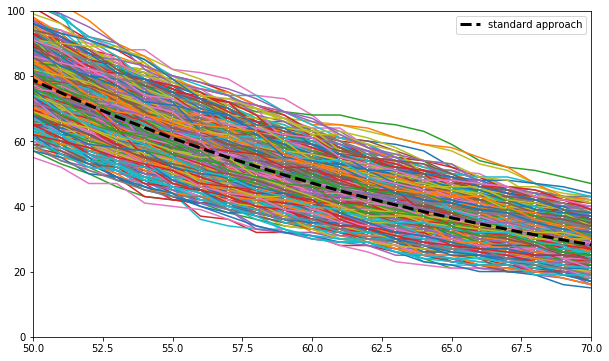

In [8]:
ax.set_xlim((50,70))
ax.set_ylim((00,100))
ax.legend()
display(fig)
fig.savefig("fig1.png", bbox_inches="tight", pad_inches=0.01)

# Single Bernouilli trials

Decrement $V$ by 1 according to a Bernouilli trial with a probability $p = V/(\tau+1)$ (for $V < \tau+1$)

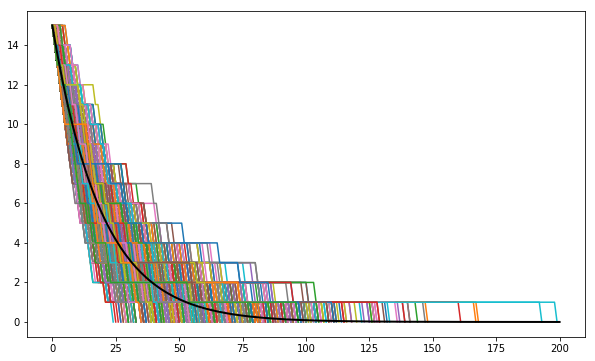

In [10]:
def stochastic_decay(V_init = 15, tau = 19, bits = 4):
    # stochastic decay from V_init (integer)
    # tau is the time constant in units of dt (integer)
    
    # initialisation
    V_bin = dec2bin(bits,V_init)                # convert to binary
    V_int = V_init                              # reset initial voltage
    Vs = V_int                                  # store V_int in trace for plotting
    
    while ( V_int > 0 ):                        # decay full trace for this seed
        V_int = bin2dec(bits, V_bin)            # convert binary stored state to integer
        V_int -= rand() < V_int/(tau + 1.0)     # decrement based on random value
        V_bin = dec2bin(bits ,V_int)            # convert back to binary (4 bits)
        Vs = append(Vs,V_int)                   # append V_int to trace

    return Vs                                


fig = figure()
fig.set_size_inches(10,6)

V_init = 15                                     # initial value
tau = 19                                        # time constant in units of dt
a = tau/(tau+1.0)                               # IIR multiplication constant
bits = 4                                        # number of bits to store
for i in range(1,1024):                         # simulate multiple independent traces
    Vs = stochastic_decay(V_init, tau, bits)
    plot(Vs)
    
Vd = V_init                                     # IIR decay trace
V = V_init                                      # IIR initial value
for t in range(200):
        V = V*a                                 # IIR decay
        Vd = append(Vd,V)                       # append to trace

plot(Vd,'k', linewidth=2);                      # plot IIR trace (once)



When $V \geq \tau+1$
$$ d = \frac{V}{\tau+1} \approx int(\frac{V}{\tau+1}) + X $$

$$ P(X=1) = (\frac{V}{\tau+1})\%1 $$

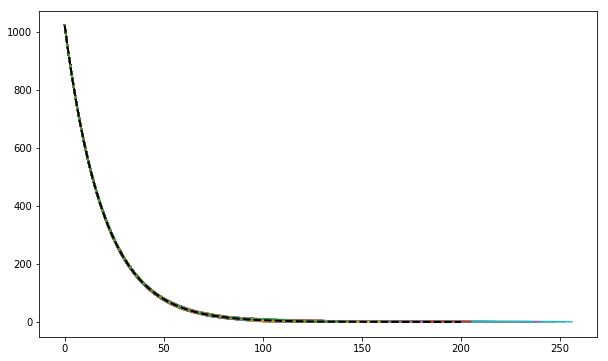

In [15]:
def stochastic_decay(V_init = 15, tau = 19, bits = 4):
    # stochastic decay from V_init (integer)
    # tau is the time constant in units of dt (integer)

    # initialisation
    V_bin = dec2bin(bits,V_init)                # convert to binary
    V_int = V_init                              # reset initial voltage
    Vs = V_int                                  # store V_int in trace for plotting
    t = 0                                       # initialise decay time counter

    while ( V_int > 0 ):                        # decay full trace for this seed
        V_int = bin2dec(bits, V_bin)            # convert binary stored state to integer
        d = V_int/(tau+1.0)                     # calculate amount to decay
        V_int -= int(d)                         # deterministic part of decrement
        V_int -= rand()<(d%1)                   # stochastic part of decrement
        V_bin = dec2bin(bits ,V_int)            # convert back to binary (4 bits)
        Vs = append(Vs,V_int)                   # append V_int to trace
        t += 1                                  # increment decay time counter

    return Vs, t                                

fig = figure()
fig.set_size_inches(10,6)
ax= subplot(1,1,1)


V_init = 1023                                   # initial value
tau = 19                                        # time constant in units of dt
a = tau/(tau+1.)                                # IIR multiplication constant
bits = 10
Ts = []
for i in range(1,1024):                         # simulate multiple independent traces
    (Vs,t) = stochastic_decay(V_init, tau, bits)
    Ts = append(Ts,t)

    plot(Vs)
    
Vd = V_init                                     # IIR decay trace
V = V_init                                      # IIR initial value
for t in range(200):
        V = V*a                                 # IIR decay
        Vd = append(Vd,V)                       # append to trace

plot(Vd,'k--', linewidth=2, label='IIR');       # plot IIR trace (once)



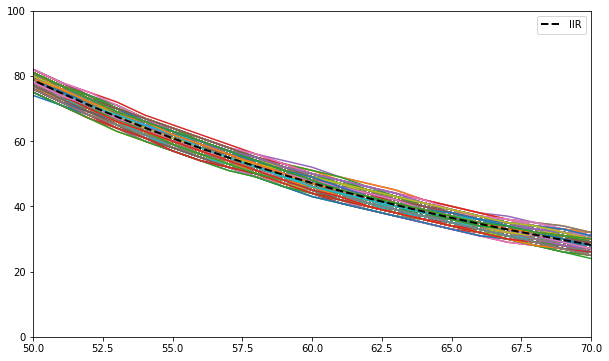

In [16]:
ax.set_xlim((50,70))
ax.set_ylim((0,100))
ax.legend()
display(fig)

# Implementation

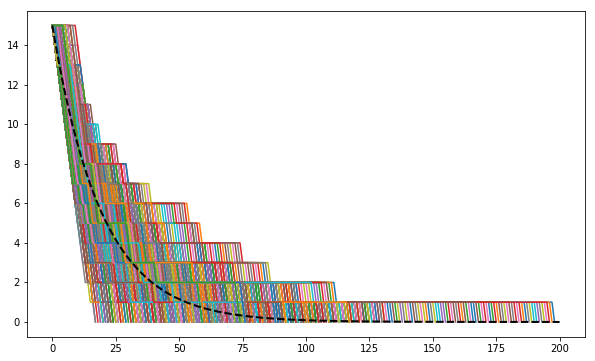

In [20]:
def LFSR_10bit (lfsr_i):
        lfsr_o = roll(lfsr_i,1)
        lfsr_o[3] = lfsr_o[3]^lfsr_o[0]
        return lfsr_o


def stochastic_decay(V_init = 15, tau = 19, seed = 123, V_bits = 4):
    # stochastic decay from V_init (integer)
    # tau is the time constant in units of dt (integer)

    # initialisation
    a = tau/(tau+1.0)
    lfsr = LFSR_10bit(dec2bin(10,seed))         # load seed
    V_bin = dec2bin(V_bits,V_init)              # convert to binary
    V_int = V_init                              # reset initial voltage
    Vs = V_int                                  # store V_int in trace for plotting
    t = 0                                       # initialise decay time counter

    while ( V_int > 0 ):                        # decay full trace for this seed
        lfsr = LFSR_10bit(lfsr)                 # generate the random fraction
        r = bin2dec(10,lfsr)/2.**10
        V_int = bin2dec(V_bits, V_bin)          # convert binary stored state to integer
        V_int = int(V_int*a+r)                  # add random fraction and multiply with IIR factor
        V_bin = dec2bin(V_bits ,V_int)          # convert back to binary (4 bits)
        Vs = append(Vs,V_int)                   # append V_int to trace
        t += 1                                  # increment decay time counter

    return Vs, t                                

fig = figure()
fig.set_size_inches(10,6)
ax= subplot(1,1,1)
tau = 19                                        # time constant in units of dt
a = tau/(tau+1.0)                               # IIR multiplication constant
V_init = 1023                                   # initial value
Ti = []                                         # empty array to store decay times
for seed in range(1,1024):                      # try all possible random seeds for lfsr
    (Vs,t) = stochastic_decay(V_init, tau, seed, V_bits=10)
    Ti = append(Ti,t)
    plot(Vs)
    
Vd = V_init                                     # IIR decay trace
V = V_init                                      # IIR initial value
for t in range(200):
        V = V*a                                 # IIR decay
        Vd = append(Vd,V)                       # append to trace

_ = plot(Vd,'k--', linewidth=2, label='IIR')        # plot IIR trace (once)


# Leaky-Integrate-and-Fire Neuron

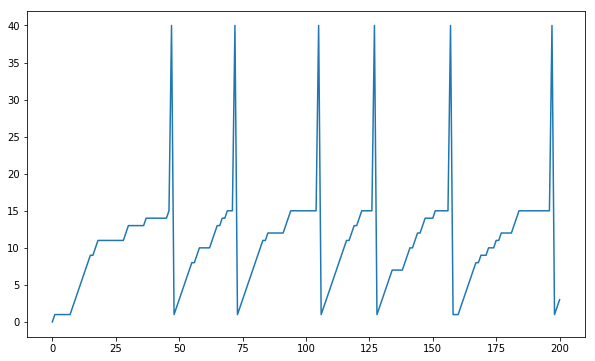

In [23]:
def V_in(t):
    V = 20                                      # constant input
    return V

def LFSR_20bit (lfsr_i):
        lfsr_o = roll(lfsr_i,1)
        lfsr_o[3] = lfsr_o[3]^lfsr_o[0]
        return lfsr_o

def SLIF(V_reset = 0, V_thres = 16, tau = 19, seed = 123, V_bits = 4, dur = 200):
    # stochastic LIF neuron
    # tau is the time constant in units of dt (integer)

    # initialisation
    a = tau/(tau+1.0)
    lfsr = LFSR_20bit(dec2bin(20,seed))         # load seed
    V_bin = dec2bin(V_bits,V_reset)             # convert to binary
    V_mem = V_reset                             # reset initial voltage
    Vs = V_mem                                  # store V_int in trace for plotting
    ST = []                                     # list of spike times

    for t in range(dur):                        # simulate dur time steps
        lfsr = LFSR_20bit(lfsr)                 # clock the shift register
        r = bin2dec(20,lfsr)/2.**20             # generate the random fraction
        V_mem = bin2dec(V_bits, V_bin)          # convert binary stored state to integer
        Vin = V_in(t)                           # read filter input
        V_mem = int((V_mem-Vin)*a + Vin + r)    # LPF equation
        Vs = append(Vs,V_mem)                   # append V_mem to  trace
        if V_mem >= V_thres:                    # check if V_mem > threshold
            V_mem = V_reset                     # reset V_mem
            Vs[-1] = 40                         # plot spike
            ST = append(ST,t)                   # record spike time
        V_bin = dec2bin(V_bits ,V_mem)          # convert back to binary (4 bits)

    return Vs, ST                                

fig = figure()
fig.set_size_inches(10,6)
ax= subplot(1,1,1)
Vs, ST = SLIF()
_ = plot(Vs)   


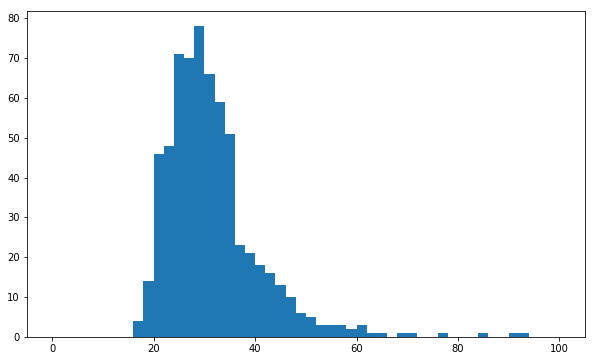

In [24]:
(Vs, ST) = SLIF(dur = 20000)
ISI = ST[1:-1] - ST[0:-2]

fig = figure()
fig.set_size_inches(10,6)
ax = subplot(1,1,1)
_ = hist(ISI, bins=50, range=(0,100))

This distribution looks much better. In fact, it looks quite a bit like a Poisson distribution with a mean spike interval of 31.

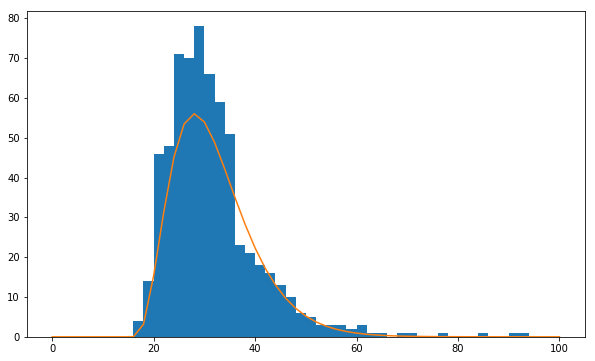

In [25]:
from scipy.stats import gamma

fig = figure()
fig.set_size_inches(10,6)
ax = subplot(1,1,1)
(n, bins, _) = hist(ISI, bins=50, range=(0,100))

_= plot(bins, 1000*gamma.pdf(bins, 4, scale=4, loc=16))

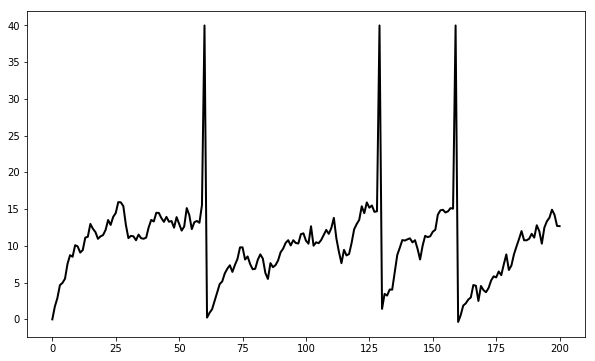

In [26]:
def LIFn(V_reset = 0, V_thres = 16, tau = 19, dur = 200):
    # LIF neuron
    # tau is the time constant in units of dt (integer)

    # initialisation
    a = tau/(tau+1.0)
    V_mem = V_reset                             # reset initial voltage
    Vs = V_mem                                  # store V_int in trace for plotting
    ST = []

    for t in range(dur):                        # simulate dur time steps
        V_mem = a*V_mem + (1-a)*V_in(t)         # LPF equation
        V_mem += randn()                        # additive Gaussian (Normal) noise
        Vs = append(Vs,V_mem)                   # append V_mem to trace
        if V_mem >= V_thres:                    # check if V_mem > threshold
            V_mem = V_reset                     # reset V_mem
            Vs[-1] = 40                         # plot spike
            ST = append(ST,t)                   # record spike time

    return Vs, ST                                

fig = figure()
fig.set_size_inches(10,6)
ax= subplot(1,1,1)
(Vs, ST) = LIFn()
_ = plot(Vs,'k', linewidth=2, label='IIR')

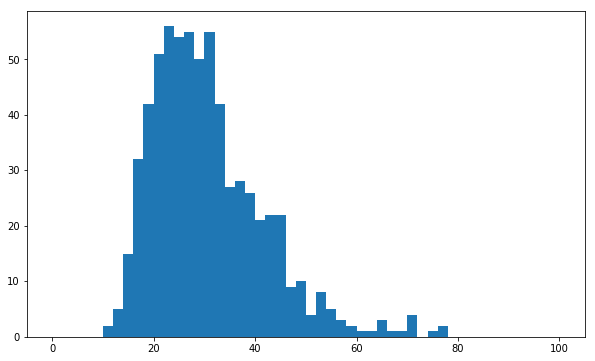

In [27]:
(Vs, ST) = LIFn(dur = 20000)
ISI = ST[1:-1] - ST[0:-2]

fig = figure()
fig.set_size_inches(10,6)
ax = subplot(1,1,1)
_ = hist(ISI, bins=50, range=(0,100))